In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np, scipy.stats as st

# variaveis

In [42]:
vm = "vm3"
path_c1 = "./220614_cluster1/"
path_c2 = "./220607_cluster2/"

infile_c1 = path_c1 + "TxMonitor_c1_" + vm + ".csv"
infile_c2 = path_c2 + "TxMonitor_c2_" + vm + ".csv"
outfile_netin = "grafico_netin_cum_" + vm + ".pdf"
outfile_netout = "grafico_netout_cum_" + vm + ".pdf"

c1_data = pd.read_csv(infile_c1)
c2_data = pd.read_csv(infile_c2)

# net-out

In [43]:
c1_netout_cum = [0]
c2_netout_cum = [0]

for i in range(1,12):
    
    round_i = c1_data.query('round==%s'%i)
    data = round_i['Net-out(bytes)'] / (1024**2) # Values in MBytes
    c1_max = np.max(data)
    c1_netout_cum.append( c1_max )
    
    round_i = c2_data.query('round==%s'%i)
    data = round_i['Net-out(bytes)'] / (1024**2) # Values in MBytes
    c2_max = np.max(data)
    c2_netout_cum.append( c2_max )    
    
    print(i, c1_max, c2_max)

1 3.728487968444824 5.4129133224487305
2 6.6433210372924805 9.626006126403809
3 12.484174728393555 17.503331184387207
4 22.698078155517578 31.027161598205566
5 46.94536304473877 55.268202781677246
6 52.471468925476074 83.29774284362793
7 63.51491641998291 83.78203678131104
8 85.44625663757324 98.90029811859131
9 85.79420471191406 112.01769733428955
10 102.9443712234497 120.78536605834961
11 109.2974157333374 161.2809133529663


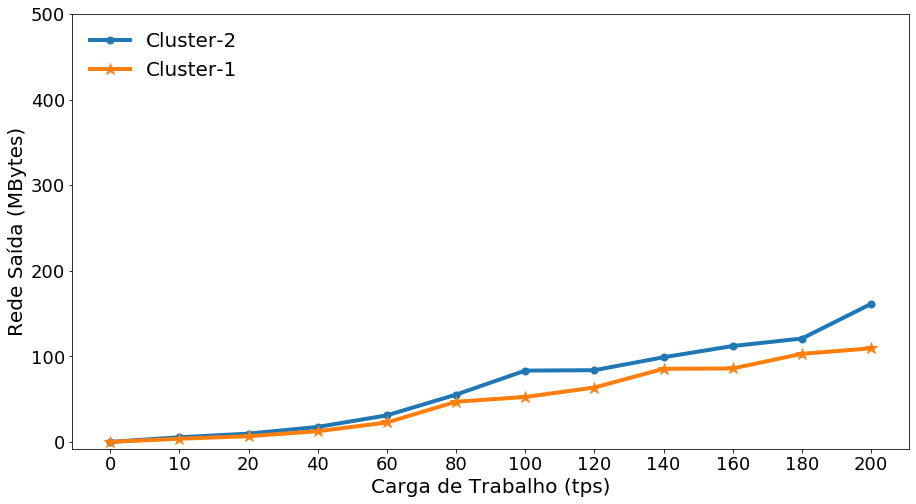

In [44]:
x = [0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y1 = c1_netout_cum
y2 = c2_netout_cum

fig,ax = plt.subplots(figsize =(15,8))
ax.set_xlabel('Carga de Trabalho (tps)', fontsize=20)
ax.set_ylabel('Rede Saída (MBytes)', fontsize=20)

#ax.grid(linestyle='dotted')
ax.plot(y2, marker=".", label="Cluster-2", linewidth=4, markersize=14)
ax.plot(y1, marker="*", label="Cluster-1", linewidth=4, markersize=12)
# ax.set_xlim(0, 200)
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, fontsize=18)
plt.yticks([0, 100, 200, 300, 400, 500], fontsize=18)
plt.legend(loc='upper left', fontsize=20, frameon=False)
plt.savefig(outfile_netout)
plt.show()

# net-in

In [45]:
c1_netin_cum = [0]
c2_netin_cum = [0]

for i in range(1,12):
    
    round_i = c1_data.query('round==%s'%i)
    data = round_i['Net-in(bytes)'] / (1024**2) # Values in MBytes
    c1_max = np.max(data)
    c1_netin_cum.append(c1_max)
    
    round_i = c2_data.query('round==%s'%i)
    data = round_i['Net-in(bytes)'] / (1024**2) # Values in MBytes
    c2_max = np.max(data)
    c2_netin_cum.append(c2_max)    
    
    print(i, c1_max, c2_max)

1 3.8877458572387695 11.107160568237305
2 6.956839561462402 21.14968204498291
3 13.17817211151123 40.967790603637695
4 24.04695224761963 76.48280143737793
5 49.729881286621094 140.31531715393066
6 56.14579772949219 214.5225419998169
7 67.49656295776367 213.77549743652344
8 90.49508953094482 252.9136381149292
9 90.87321662902832 289.0646028518677
10 109.29160499572754 314.7650032043457
11 115.49621295928955 423.8867349624634


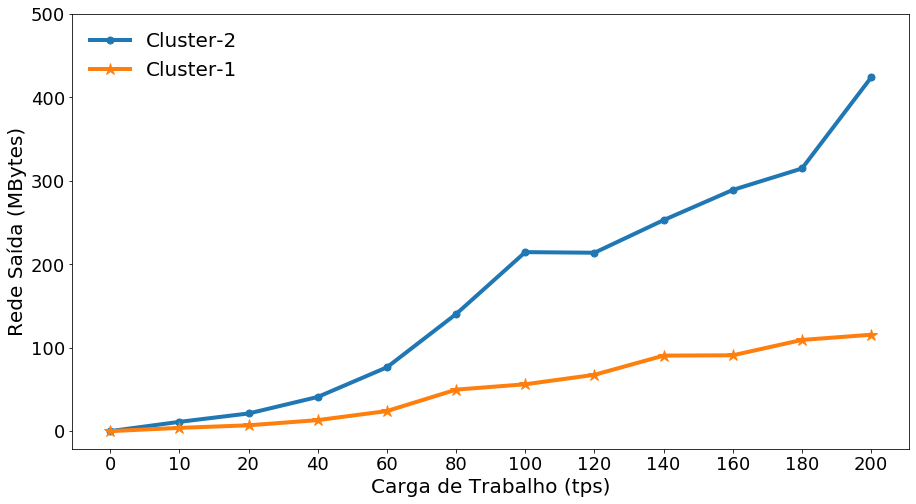

In [46]:
x = [0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y1 = c1_netin_cum
y2 = c2_netin_cum

fig,ax = plt.subplots(figsize =(15,8))
ax.set_xlabel('Carga de Trabalho (tps)', fontsize=20)
ax.set_ylabel('Rede Saída (MBytes)', fontsize=20)

#ax.grid(linestyle='dotted')
ax.plot(y2, marker=".", label="Cluster-2", linewidth=4, markersize=14)
ax.plot(y1, marker="*", label="Cluster-1", linewidth=4, markersize=12)
# ax.set_xlim(0, 200)
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, fontsize=18)
plt.yticks([0, 100, 200, 300, 400, 500], fontsize=18)
plt.legend(loc='upper left', fontsize=20, frameon=False)
plt.savefig(outfile_netin)
plt.show()